In [1]:
#%%
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


#%%
X, y = load_digits(return_X_y=True)  #加载手写数字数据集




$
RBF(x,\hat{x})= exp(-||x-\hat{x}||_2^2 / 2\sigma^2) \\
\gamma = \frac{1}{2\sigma^2} \\
n_{jobs}:任务并行数 \\
cv:K-折交叉验证中的K
$

In [2]:
#%%
param_range = np.logspace(-6, -1, 50, base=10)   # gamma 取值范围，网格搜索 
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv=5)

#print(train_scores.shape) //(50,5)


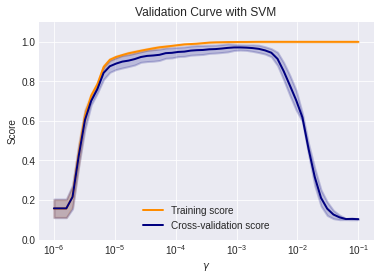

In [3]:
# %%  对于同一个gamma 计算5次结果的均值、方差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#%%
plt.style.use("seaborn-darkgrid")
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()